In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

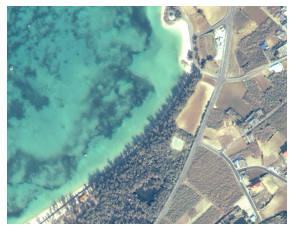

In [ ]:
# 画像の読み込み
img = np.array(Image.open('/content/drive/MyDrive/irabu_zhang1.bmp'))
plt.axis('off')
plt.imshow(img)

In [ ]:
# K=5のk-meansでx = (R, G, B)のベクトルをクラスタリングする
# 1. ランダムにk個のμを選択
# 2. μiからの近さに応じて各点をクラスタリング
# 3. μiを再計算
# 4. μiが変わらなくなるまで繰り返す

# 乱数のシード値固定
np.random.seed(0)

# クラスタ数
K = 5
# 最大ループ
MAX_LOOP = 300
# 画像サイズ
H, W, C = img.shape


In [ ]:
def init_mu():
    # μiの初期化：ランダムにk個のμを選択
    mu_list = []
    for i in range(K):
        h, w = np.random.randint(0, H), np.random.randint(0, W)
        mu_list.append(img[h, w])
    return np.array(mu_list, dtype=np.float32)

In [ ]:
def calc_norm(mu_list, pixel):
    # 各μiと各画素値の距離を求め、最小のインデックスを返す
    dist = np.linalg.norm(mu_list - pixel, axis=-1)
    return np.argmin(dist)

In [ ]:
def resample(img, mu_list):
    # 全画素に対して各μiとの距離を求めクラスタリングする
    cluster_list = [[], [], [], [], []]
    for h in range(H):
        for w in range(W):
            pixel = np.array(img[h, w], dtype=np.float32)
            cls = calc_norm(mu_list, pixel)
            cluster_list[cls].append(pixel)
    return cluster_list

def calc_mu(cluster_list):
    # クラスタリング結果を基に新しいμiを求める
    return np.array([np.mean(cluster_list[i],axis=0) for i in range(len(cluster_list))])


In [ ]:
def train(img, MAX_LOOP=MAX_LOOP):
    # K=5のk-meansでx = (R, G, B)のベクトルをクラスタリングする
    DIFF = 0.1
    # 1. ランダムにk個のμを選択
    mu_list = init_mu()
    for n in range(MAX_LOOP):
        # 2. μiからの近さに応じて各点をクラスタリング
        cluster_list = resample(img, mu_list)
        # 3. μiを再計算
        new_mu = calc_mu(cluster_list)
        sub_mu = mu_list - new_mu
        mu_list = new_mu
        # 4. μiが変わらなくなるまで繰り返す
        if all(sub_mu.flatten()<DIFF):
            return mu_list
    return mu_list


In [ ]:
def classify(img, mu_list, color_list):
    # 求めたμiを用いて画像内の各画素を所属するμの色で塗る
    cls_img = np.zeros_like(img)
    for h in range(H):
        for w in range(W):
            pixel = np.array(img[h, w], dtype=np.float32)
            cls = calc_norm(mu_list, pixel)
            cls_img[h, w] = color_list[cls]
    return np.asarray(cls_img, dtype=np.uint8)

In [ ]:
# メイン処理
mu_list = train(img)
cls_img = classify(img, mu_list, mu_list)

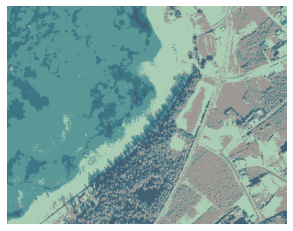

In [ ]:
# 結果の描画
plt.imshow(cls_img)
plt.axis('off')
plt.show()

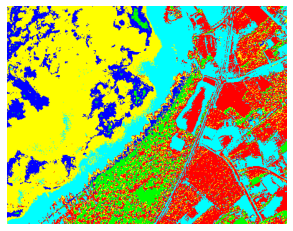

In [ ]:
# わかりやすいように各クラスに赤、青、緑、シアン、イエローで塗り分ける
c_list = [[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255]]
cls_img = classify(img, mu_list, c_list)
plt.imshow(cls_img)
plt.axis('off')
plt.show()